Задание № 1 (Обязательно) Вам даны результаты проверки двух препаратов.
Требуется:

Оценить, есть ли различие в эффекте у этих пациентов?
Визуально подтвердить результат

A - результаты для группы людей получающих препарат А.

B - результаты для другой группы людей, получающих препарат B.

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)


In [ ]:
# Н0: различие в эффекте применения препаратов случайно, то есть средние значения двух ГС, из которых извлечены выборки, не отличаются

# Проверим условия для выбора критерия

# 1. распределение нормальное
# 2. выборки независимые
# 3. проверим равенство дисперсий по критерию Фишера (Н0: дисперсии равны)

F = np.var(B)/np.var(A)
# cdf (функция распределения) - передаем значение оценки, получаем вероятноть (уровень доверия), pdf (фукнкция плотности распределения) - передаем вероятность (уровень доверия), получаем значение оценки
# по таблице критических значений Фишера нашли ближайшую вероятность и вычли ее из 1, таким образом нашли вероятность того, что значение F будет такое же или правее (p_value) при условии, что Н0 верна
p_value = 1 -stats.f.cdf(F, len(A)-1, len(B)-1) 
p_value
# Н0 отклоняем, предполагаем на 5% уровне значимости, что дисперсии не равны

# Вывод: применяем непараметрический аналог: критерий Манна-Уитни

2.0314860904591114e-12

In [ ]:
# Критерий Манна - Уитни
alpha = 0.05
from scipy.stats import mannwhitneyu

stat, p_value =mannwhitneyu(A, B)

if p_value < alpha:
    print('H0 отклоняем, предполагаем, что средние отличаются, разница между лекарствами есть')
else:
    print('Н0 не отклоняем, предполагаем на 5% уровне значимости, что различие в эффекте применения препаратов случайно')

Н0 не отклоняем, предполагаем на 5% уровне значимости, что различие в эффекте применения препаратов случайно


(array([ 5.,  7., 13., 13., 21., 16., 11.,  8.,  3.,  3.]),
 array([-99.92486747, -73.18817253, -46.45147758, -19.71478263,
          7.02191231,  33.75860726,  60.4953022 ,  87.23199715,
        113.9686921 , 140.70538704, 167.44208199]),
 <a list of 10 Patch objects>)

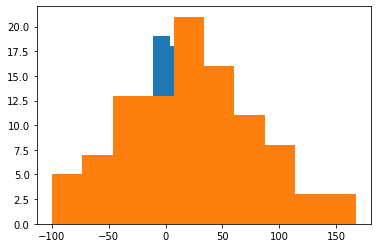

In [ ]:
plt.hist(A)
plt.hist(B)

Задание № 2 (Обязательно) Вам даны результаты проверки двух препаратов.
Требуется:

Оценить, есть ли различие в эффекте у этих пациентов?
Визуально подтвердить результат

А - группа людей без препарата.

B - та же группа людей, но получающая препарат

In [ ]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)


In [ ]:
# Н0: различие в эффекте применения препаратов случайно, то есть средние значения двух связанныъ выборок равны 

# Проверим условия для выбора критерия

# 1. распределение нормальное
# 2. выборки связанные

# Используем критерий Стъюдента для связанных выборок

alpha = 0.05
t, p_value = stats.ttest_rel(A, B)

if p_value < alpha:
    print('H0 отклоняем на уровне значимости 5%, есть статистически значимое различие в препаратах')
else:
    print('Н0 не отклоняем, предполагаем на 5% уровне значимости, что различие в эффекте применения препаратов случайно')



H0 отклоняем на уровне значимости 5%, есть статистически значимое различие в препаратах


(array([ 5.,  7., 13., 13., 21., 16., 11.,  8.,  3.,  3.]),
 array([-99.92486747, -73.18817253, -46.45147758, -19.71478263,
          7.02191231,  33.75860726,  60.4953022 ,  87.23199715,
        113.9686921 , 140.70538704, 167.44208199]),
 <a list of 10 Patch objects>)

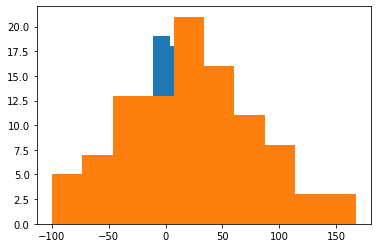

In [ ]:
plt.hist(A)
plt.hist(B)

Задание № 3 (Обязательно)
 Допустим вы решили устроить дачный эксперимент. Берем и поливаем одни огурцы водой, другие огурцы водой с удобнением, третью группу огурцов будем поливать минералкой.

Используя дисперсионный анализ, сделайте выводы о распредлениях результатов. 

Есть ли эффект от удобрения по сравнению с минералкой?

Помимо результата статистического теста, продемонстрируйте отличия визуально с помощью boxplot или hist

In [ ]:
water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]
nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]
mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]


In [ ]:
# Предположим, что речь идет о весе огурцов в кг. Получается, что необходимо оценить, как зависит размер огурцов от способа удобрения (вода, удобрение, минералка).
# Имеем три выборки, Н0: средние значения всех групп равны, то есть эффект от способа удобрения случаен

# Проверяем органичения применения однофакторный дисперсионный анализ
# 1. выборки независимые
# 2. одинаковые дисперсии в выборках. Проверим с помощью теста Левене (H0: дисперсии выборок равны). Н0 принимаем на 5% уровне значимости
# 3. общее кол-во наблюдений > 30, кол-во наблюдений в каждой выборке > 5

stats.levene(water, nutri, mineral)

LeveneResult(statistic=0.02026693420999462, pvalue=0.9799438787333941)

In [ ]:
# Применяем ANOVA

alpha = 0.05
f_value, p_value = stats.f_oneway(water, nutri, mineral)

if p_value<alpha:
    print('H0 отклоняем на 5% уровне значимости, вес огурцов зависит от способа удобрения (однако не знаем, какого именно)')
else:
    print('Н0 принимаем, эффект от способа удобрения случаен')


H0 отклоняем на 5% уровне значимости, вес огурцов зависит от способа удобрения (однако не знаем, какого именно)


(array([4., 0., 5., 0., 0., 5., 0., 5., 0., 2.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

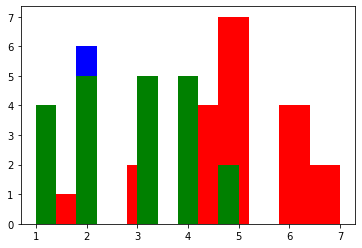

In [ ]:
plt.hist(water, color = 'blue')
plt.hist(nutri, color = 'red')
plt.hist(mineral, color = 'green')

In [ ]:
# преобразуем данные для построения boxplot

weight = water + nutri + mineral
kinds = ['water']*len(water) + ['nutri']*len(nutri) + ['mineral']*len(mineral)
df = pd.DataFrame()
df['weight'] = weight
df['kinds'] = kinds
df

,weight,kinds
0,1,water
1,2,water
2,3,water
3,4,water
4,2,water
...,...,...
57,3,mineral
58,4,mineral
59,5,mineral
60,1,mineral


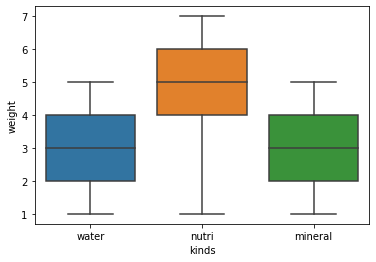

In [ ]:
ax = sns.boxplot(x ='kinds', y = 'weight', data = df )
# видно, что группы water и mineral примерно равны, а nutri сильно отличается, это и показал ANOVA, что группы отличаются

In [ ]:
# Чтобы статистически проверить между какими группами есть отличия, проверим статистические отличие между средними с помощью t-критерия Стъюдента с поправкой Бонферрони (alpha/кол-во пар для сравнения)
alpha = 0.05/3 
stat_1, p_value_1 = stats.ttest_ind(water, nutri)
stat_2, p_value_2 = stats.ttest_ind(water, mineral)
stat_3, p_value_3 = stats.ttest_ind(nutri, mineral)

if p_value_1 < alpha:
    print('H0 отклоняем, есть отличия между водой и удобрением')
else:
    print('H0 принимаем, нет отличий между водой и удобрением')


H0 отклоняем, есть отличия между водой и удобрением


In [ ]:
if p_value_2 < alpha:
    print('H0 отклоняем, есть отличия между водой и минералкой')
else:
    print('H0 принимаем, нет отличий между водой и минералкой')

H0 принимаем, нет отличий между водой и минералкой


In [ ]:
if p_value_3 < alpha:
    print('H0 отклоняем, есть отличия между удобрением и минералкой')
else:
    print('H0 принимаем, нет отличий между удобрением и минералкой')

H0 отклоняем, есть отличия между удобрением и минералкой


# Cookie Cats (Обязательно)

Cookie Cats - чрезвычайно популярная мобильная игра-головоломка, разработанная Tactile Entertainment. Это классическая игра-головоломка в стиле «соедините три», в которой игрок должен соединять плитки одного цвета, чтобы очистить поле и выиграть уровень. Здесь также есть поющие кошки. Посмотрите эту короткую демонстрацию:

По мере прохождения уровней игры игроки время от времени сталкиваются с воротами, которые заставляют их ждать нетривиальное количество времени или совершать покупки в приложении, чтобы продолжить. Помимо стимулирования покупок в приложении, эти ворота служат важной цели - дать игрокам вынужденный перерыв в игре, что, как мы надеемся, приведет к увеличению и продлению удовольствия от игры.

Но где ставить ворота? Первоначально первые ворота были размещены на уровне 30. В этом проекте вам предлагается проанализировать AB-тест, в котором создатели переместили первые ворота в Cookie Cats с 30 уровня на уровень 40. В частности, вам надо рассмотрим влияние A/B теста на удержание игроков.

# Данные A/B тестирования

In [ ]:
cookie_cats = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/cookie_cats.csv'

data = pd.read_csv(cookie_cats, error_bad_lines=False)  # Откроем датасет
data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


**Данные получены от 90 189 игроков, которые установили игру во время проведения AB-теста.**

Переменные:

userid - уникальный номер, идентифицирующий каждого игрока.

version - был ли игрок помещен в контрольную группу (gate_30 - ворота на уровне 30) или в тестовую группу (gate_40 - ворота на уровне 40).

sum_gamerounds - количество игровых раундов, сыгранных игроком в течение первой недели после установки

retention_1 - проигрыватель вернулся и поиграл через 1 день после установки?

retention_7 - проигрыватель вернулся и играл через 7 дней после установки?

Когда игрок устанавливал игру, ему случайным образом назначали gate_30 или gate_40.





**Задание: провести анализ данных и сделать выводы о лучшем месте для установки ворот.**

Замечание: приведенных вспомогательных фрагментов кода не хватает для ответа на вопрос.
 Делать выводы необходимо опираясь на статистические тесты, разобранные в лекции. Большим плюсом будет построение визуализиции для подтверждения ваших выводом. Рекомендую использовать seaborn c его sns.boxplot/sns.carplot, sns.barplot, но можно обойтись и обычном matplotlib

In [ ]:
#Сгрупируем результаты теста по версиям игры.
data.groupby('version').count()

# по результатам данной команды можно сказать, что размеры контрольной и тестовой групп примерно одинаковые (50/50)

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,40800,40800,40800,40800
gate_40,41562,41562,41562,41562


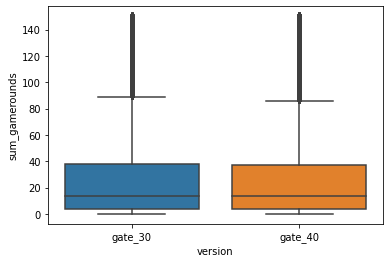

In [ ]:
sns.boxplot(x = 'version', y = 'sum_gamerounds', data = data)

# 75% данных лежат в от 0 до 150, поэтому будем удалять все, что больше 150

In [ ]:
# удаляем хвосты
data = data.drop(data.loc[data['sum_gamerounds']>150].index)

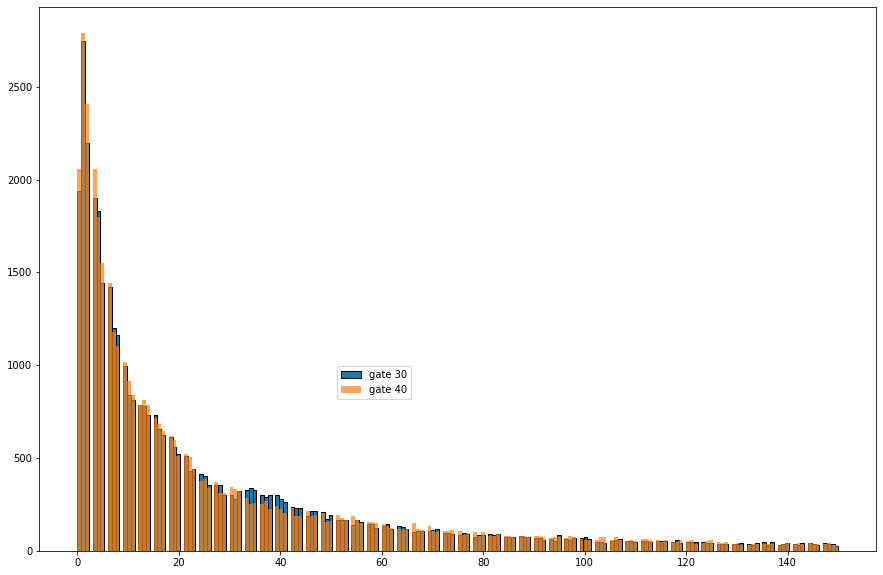

In [ ]:
# визуализируем группы в зависимости от кол-ва прйденных раундов с помощью гистаграммы
v_30 = data.loc[data.version == 'gate_30']
v_40 = data.loc[data.version == 'gate_40']


bins = 200
plt.figure(figsize=(15, 10))
# alpha - уровень прозрачности, bbox_to_anchor - расположение легенды в зависимости от графика, а не от сетки
plt.hist(v_30['sum_gamerounds'], bins=bins, alpha=1, edgecolor='black', label='gate 30')
plt.hist(v_40['sum_gamerounds'], bins=bins, alpha=0.7, label='gate 40')
plt.legend(loc='upper right', bbox_to_anchor=(0.45, 0.35))
plt.show()

# вывод: распределение не нормальное (похоже на хи-квадрат), есть различия в кол-ве игровых раундов на отрезке примерно между 20 и 50. ???Необходмимо проверить, значимы ли они и что могут означать

<Figure size 1080x720 with 0 Axes>

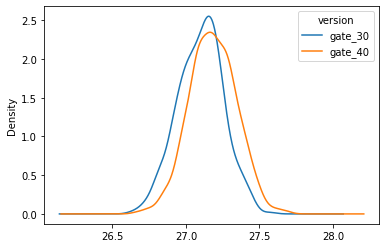

In [ ]:
# визуализируем различия между средним  кол-ом сыгранных игр с помощью бустрап

plt.figure(figsize=(15, 10))

# берем 1000 выборок с помощью семплирования (frac - доля возвращаемых элементов, 1 - возвращаем весь столбец; replace - возможность использовать ту же самую строку несколько раз в одном семпле: ведет к повторению строк--> разные средние значения)
boot_1d = []
for i in range(1000):
    boot_mean = data.sample(frac = 1, replace = True).groupby('version')['sum_gamerounds'].mean()  #retention_7
    boot_1d.append(boot_mean)
    
# Преобразование списка в DataFrame
boot_1d = pd.DataFrame(boot_1d)
    
# A Kernel Density Estimate plot of the bootstrap distributions
boot_1d.plot(kind='density')

In [ ]:
# Применяем критерий Манна-Уитни для проверки статистически значимых различий между кол-ом пройденных раундов в группах gate_30 и gate_40.
# H0: уровень ворот не влияет на среднее кол-во  пройденных раундов

from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(boot_1d['gate_30'], boot_1d['gate_40'])

alpha = 0.95

if p < alpha:
    print('H0 отклоняется на 5% уровне значимости, средние значения пройденных раундов в группах отличаются')
else:
    print('H0 принимаем, статистически значимых отличий в среднем нет')



H0 отклоняется на 5% уровне значимости, средние значения пройденных раундов в группах отличаются


<Figure size 1080x720 with 0 Axes>

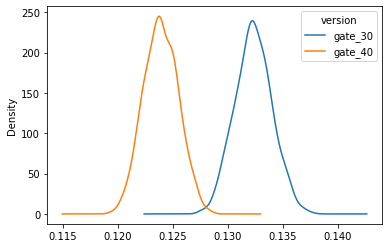

In [ ]:
# Визуализируем различия между средними значениями вернувшихся через 7 дней после установки игры. Т.к. значений всего 2, применим бустрап
plt.figure(figsize=(15, 10))

# берем 1000 выборок с помощью семплирования (frac - доля возвращаемых элементов, 1 - возвращаем весь столбец; replace - возможность использовать ту же самую строку несколько раз в одном семпле: ведет к повторению строк--> разные средние значения)
boot_1d = []
for i in range(1000):
    boot_mean = data.sample(frac = 1, replace = True).groupby('version')['retention_7'].mean()  #retention_7
    boot_1d.append(boot_mean)
    
# Преобразование списка в DataFrame
boot_1d = pd.DataFrame(boot_1d)
    
# A Kernel Density Estimate plot of the bootstrap distributions
boot_1d.plot(kind='density')

In [ ]:
# Применем критерий t-Стъюдента, чтобы проверить различия средних значений вернувшихмя через 7 дней в зависимости от ворот

stat, p = stats.ttest_ind(boot_1d['gate_30'], boot_1d['gate_40'])

alpha = 0.95

if p < alpha:
    print('H0 отклоняется на 5% уровне значимости, средние значения вернувшихся в группах отличаются')
else:
    print('H0 принимаем, статистически значимых отличий в среднем нет')

H0 отклоняется на 5% уровне значимости, средние значения вернувшихся в группах отличаются


Выводы:
1. средние кол-во пройденных раундов статистически значимо отличаются (gate_40> gste_30), но скорее всего причина в том, что при gate_40 больше открыто бесплатных раундов
2. статистически значимо отличаются среднее кол-во вернувшихся в игру через 7 дней, при gate_30 их  больше.
Таким образом, нужно ставить gate_30, т.к. это значение ворот в большей степени способствует удержанию игроков

# Покемоны и AB-тестирование


Покемоны - это маленькие существа, которые сражаются друг с другом на соревнованиях. Все покемоны имеют разные характеристики (сила атаки, защиты и т. д.) И относятся к одному или двум так называемым классам (вода, огонь и т. д.).

 Профессор Оук является изобретателем Pokedex, портативного устройства, которое хранит информацию обо всех существующих покемонах. Как его ведущий специалист по данным, Вы только что получили от него запрос с просьбой осуществить аналитику данных на всех устройствах Pokedex.

Описание набора данных

Профессор Оук скопировал все содержимое память одного устройства Pokedex, в результате чего получился набор данных, с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:

pid: Numeric - ID покемона

HP: Numeric - Очки здоровья

Attack: Numeric - Сила обычной атаки

Defense: Numeric - Сила обычной защиты

Sp. Atk: Numeric - Сила специальной атаки

Sp. Def: Numeric - Сила специальной защиты

Speed: Numeric - Скорость движений

Legendary: Boolean - «True», если покемон редкий

Class 1: Categorical - Класс покемона

Class 2: Categorical - Класс покемона

In [ ]:
pokemon_path = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/pokemon.csv'
pokemon = pd.read_csv(pokemon_path, error_bad_lines=False)  # Откроем датасет
pokemon.head()

 
#Обратите внимание, что у покемона может быть один или два класса. Если у покемона два класса, считается,
#что они имеют одинаковую значимость.

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


# Задачи

**Задание № 1 (Обязательно):**

Профессор Оук подозревает, что покемоны в классе grass имеют более сильную обычную атаку, чем у покемонов в классе rock. Проверьте, прав ли он, и убедите его в своем выводе статистически.

Примечание: если есть покемоны, которые относятся к обоим классам, просто выбросьте их;

Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

In [ ]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   pid        800 non-null    int64 
 1   Name       799 non-null    object
 2   Class 1    800 non-null    object
 3   Class 2    414 non-null    object
 4   HP         800 non-null    int64 
 5   Attack     800 non-null    int64 
 6   Defense    800 non-null    int64 
 7   Sp. Atk    800 non-null    int64 
 8   Sp. Def    800 non-null    int64 
 9   Speed      800 non-null    int64 
 10  Legendary  800 non-null    bool  
dtypes: bool(1), int64(7), object(3)
memory usage: 63.4+ KB


In [ ]:
# нашли и удалили покемонов, которые принадлежат сразу двум классам: Grass и Rock
index = pokemon[(pokemon['Class 1'] == 'Grass') & (pokemon['Class 2'] == 'Rock') | (pokemon['Class 2'] == 'Grass') & (pokemon['Class 1'] == 'Rock')].index 

In [ ]:
pokemon_task = pokemon.drop(index = index)

In [ ]:
Attack_Grass = pokemon_task [(pokemon_task ['Class 1'] == 'Grass') |(pokemon_task ['Class 2'] == 'Grass')]['Attack']


In [ ]:
Attack_Rock = pokemon_task[(pokemon_task ['Class 1'] == 'Rock') |(pokemon_task ['Class 2'] == 'Rock')]['Attack']


(array([ 1.,  1., 10.,  5.,  8., 10.,  7.,  6.,  5.,  3.]),
 array([ 10. ,  25.5,  41. ,  56.5,  72. ,  87.5, 103. , 118.5, 134. ,
        149.5, 165. ]),
 <a list of 10 Patch objects>)

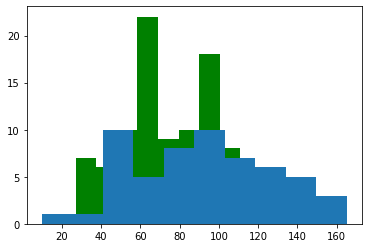

In [ ]:
plt.hist(Attack_Grass, color = 'green')
plt.hist(Attack_Rock)

In [ ]:
Attack_Grass.describe()

count     93.000000
mean      73.731183
std       24.179645
min       27.000000
25%       59.000000
50%       70.000000
75%       95.000000
max      132.000000
Name: Attack, dtype: float64

In [ ]:
Attack_Rock.describe()

count     56.000000
mean      91.785714
std       34.805284
min       10.000000
25%       63.000000
50%       92.500000
75%      116.250000
max      165.000000
Name: Attack, dtype: float64

Судя по первичному анализу данных, профессор не прав: покемоны Rock обладают более сильной атакой, чем покемоны Grass.
Докажем это статистически

In [ ]:
# Проверим равенство диперсий. Н0: дисперсии равны
F = np.var(Attack_Rock)/np.var(Attack_Grass)
p_value = 1 -stats.f.cdf(F, len(Attack_Rock)-1, len(Attack_Grass)-1) 
p_value

# Отконяем Н0 на 5% уровне значимости, будем использовать критерий Манна-Уитни

0.0010985604631855717

In [ ]:
# H0: средние значения атаки для классов равны. Н альтернативная: покемоны Rock обладают более сильной атакой, чем покемоны Grass
from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(Attack_Grass, Attack_Rock)
p

# H0 отклоняем, принимаем альтернативную гипотезу:покемоны Rock обладают более сильной атакой, чем покемоны Grass. 

0.0010133329572143746


**Задание № 2 (Обязательно):**

Профессор Оук уже долго не может спать по ночам ведь его волнует вопрос, а правда, что покемоны что покемоны в классе Water в среднем более быстрые, чем покемоны в классе Normal.

Проверьте, прав ли он, и убедите его в своем выводе статистически.

Примечание: если есть покемоны относятся к обоим классам, выбросьте их;

Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

In [ ]:
# нашли и удалили покемонов, которые принадлежат сразу двум классам: Water и Normal
index = pokemon[(pokemon['Class 1'] == 'Water') & (pokemon['Class 2'] == 'Normal') | (pokemon['Class 2'] == 'Water') & (pokemon['Class 1'] == 'Normal')].index
pokemon_task = pokemon.drop(index = index)

In [ ]:
Speed_Water = pokemon_task [(pokemon_task ['Class 1'] == 'Water') |(pokemon_task ['Class 2'] == 'Water')]['Speed']
Speed_Water.describe()

count    125.00000
mean      64.93600
std       22.74889
min       15.00000
25%       50.00000
50%       65.00000
75%       81.00000
max      122.00000
Name: Speed, dtype: float64

In [ ]:
Speed_Normal = pokemon_task [(pokemon_task ['Class 1'] == 'Normal') |(pokemon_task ['Class 2'] == 'Normal')]['Speed']
Speed_Normal.describe()

count    101.000000
mean      72.257426
std       28.427330
min        5.000000
25%       50.000000
50%       72.000000
75%       93.000000
max      135.000000
Name: Speed, dtype: float64

Судя по первичному анализу данных, профессор не прав: покемоны Normal обладают более высокой скоростью, чем покемоны Water.
Докажем это статистически

In [ ]:
# Проверим равенство диперсий. Н0: дисперсии равны
F = np.var(Speed_Normal)/np.var(Speed_Water)
p_value = 1 -stats.f.cdf(F, len(Speed_Normal)-1, len(Speed_Water)-1) 
p_value

# Отконяем Н0 на 5% уровне значимости, будем использовать критерий Манна-Уитни

0.009509951412015383

In [ ]:
# H0: средние значения атаки для классов равны. Н альтернативная: покемоны Normal обладают более высокой скоростью, чем покемоны Water
from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(Speed_Normal, Speed_Water)
p

# H0 отклоняем, принимаем альтернативную гипотезу:покемоны Normal обладают более высокой скоростью, чем покемоны Water 

0.019054075952765006

**Задание № 3:**
Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона. Однако, мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку следующим покемонам: смотри массив treathed_pokemon. Проверьте, работает ли вообще его сыворотка, убедите всех в своем выводе статистически.

Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

In [ ]:
# Покемоны, которые принимали сыворотку увеличения скорости
treathed_pokemon = ['Mega Beedrill','Mega Alakazam', 'Deoxys Normal Forme', 'Mega Lopunny']

In [ ]:
pd_treathed_pokemon = pokemon.loc[pokemon['Name'].isin(treathed_pokemon)]

In [ ]:
pd_treathed_pokemon.describe()

,pid,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,4.000000,4.00,4.000000,4.000000,4.00000,4.000000,4.000000
mean,249.500000,58.75,121.500000,62.250000,98.50000,80.250000,145.000000
std,236.750924,7.50,48.121374,23.528352,76.28237,21.453438,7.071068
min,20.000000,50.00,50.000000,40.000000,15.00000,50.000000,135.000000
25%,59.000000,53.75,114.500000,47.500000,44.25000,72.500000,142.500000
50%,250.500000,60.00,143.000000,57.500000,102.00000,87.500000,147.500000
75%,441.000000,65.00,150.000000,72.250000,156.25000,95.250000,150.000000
max,477.000000,65.00,150.000000,94.000000,175.00000,96.000000,150.000000


In [ ]:
pd_untreathed_pokemon = pokemon.drop(pd_treathed_pokemon.index)
pd_untreathed_pokemon.describe()

,pid,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,796.000000,796.000000,796.000000,796.000000,796.000000,796.000000,796.000000
mean,401.258794,69.311558,78.787688,73.900754,72.690955,71.860553,67.891960
std,230.958584,25.583769,32.263130,31.217540,32.416705,27.861371,28.614785
min,1.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,201.750000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000
50%,400.500000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000
75%,601.250000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,800.000000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000


<Figure size 1080x720 with 0 Axes>

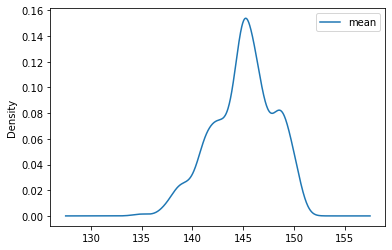

In [ ]:
# Не можем сравнивать выборки, в которых N= 4 и N = 796. С помощью бустрапа увеличим объем выборки покемонов, которым дали лекарство
plt.figure(figsize=(15, 10))

# берем 1000 выборок с помощью семплирования (frac - доля возвращаемых элементов, 1 - возвращаем весь столбец; replace - возможность использовать ту же самую строку несколько раз в одном семпле: ведет к повторению строк--> разные средние значения)
boot_1d = []
for i in range(700):
    boot_mean = pd_treathed_pokemon.sample(frac = 1, replace = True)['Speed'].mean()  #retention_7
    boot_1d.append(boot_mean)
    
# Преобразование списка в DataFrame
boot_1d = pd.DataFrame(boot_1d, columns = ['mean'])
    
# A Kernel Density Estimate plot of the bootstrap distributions
boot_1d.plot(kind='density')

In [ ]:
boot_1d.describe()
# Средняя скорость получивших ускорение покемонов увеличилась незначительно после бустрапа

,0
count,700.000000
mean,145.137500
std,3.166844
min,135.000000
25%,142.500000
50%,145.000000
75%,147.500000
max,150.000000


In [ ]:
from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(pd_untreathed_pokemon['Speed'], boot_1d['mean'])
p

# H0 отклоняем, принимаем альтернативную гипотезу: сыворотка работает

1.2086876376095906e-239

**Задание № 6:**
Профессор Оук частенько наблюдает за боями покемонов. После очередных таких боев Оук выделил три класса best_defence_class, которые на его взгляд одинаковы по "силе обычной защиты" Defense. Проверьте, действительно ли эти классы покемонов не отличаются по уровню защиты статистически значимо? Все та же статистика вам в помощь!



In [ ]:
best_defence_class = ['Rock', 'Ground','Steel','Ice']

In [ ]:
pokemon_Rock = pokemon[(pokemon['Class 1'] == 'Rock') |(pokemon['Class 2'] == 'Rock') ]['Defense']
pokemon_Rock.describe()

count     58.000000
mean     107.086207
std       38.373641
min       40.000000
25%       85.000000
50%      104.000000
75%      130.000000
max      230.000000
Name: Defense, dtype: float64

In [ ]:
pokemon[(pokemon['Class 1'] == 'Rock') |(pokemon['Class 2'] == 'Rock') ]

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
80,81,Geodude,Rock,Ground,40,80,100,30,30,20,False
81,82,Graveler,Rock,Ground,55,95,115,45,45,35,False
82,83,Golem,Rock,Ground,80,120,130,55,65,45,False
103,104,Onix,Rock,Ground,35,45,160,30,45,70,False
119,120,Rhyhorn,Ground,Rock,80,85,95,30,30,25,False
120,121,Rhydon,Ground,Rock,105,130,120,45,45,40,False
149,150,Omanyte,Rock,Water,35,40,100,90,55,35,False
150,151,Omastar,Rock,Water,70,60,125,115,70,55,False
151,152,Kabuto,Rock,Water,30,80,90,55,45,55,False
152,153,Kabutops,Rock,Water,60,115,105,65,70,80,False


In [ ]:
pokemon_Ground = pokemon[(pokemon['Class 1'] == 'Ground') |(pokemon['Class 2'] == 'Ground') ]['Defense']
pokemon_Ground.describe()

count     67.000000
mean      87.701493
std       37.909388
min       25.000000
25%       60.000000
50%       84.000000
75%      107.500000
max      230.000000
Name: Defense, dtype: float64

In [ ]:
pokemon_Steel = pokemon[(pokemon['Class 1'] == 'Steel') |(pokemon['Class 2'] == 'Steel') ]['Defense']
pokemon_Steel.describe()

count     49.000000
mean     116.612245
std       39.200243
min       50.000000
25%       91.000000
50%      106.000000
75%      140.000000
max      230.000000
Name: Defense, dtype: float64

In [ ]:
pokemon_Ice = pokemon[(pokemon['Class 1'] == 'Ice') |(pokemon['Class 2'] == 'Ice') ]['Defense']
pokemon_Ice.describe()

count     38.000000
mean      76.657895
std       34.183350
min       15.000000
25%       50.000000
50%       80.000000
75%       90.000000
max      184.000000
Name: Defense, dtype: float64

In [ ]:
# Применем дисперсионный анализ для выявления различий между группами. Н0: нет статистически значимых отличий
stat, p_value = stats.f_oneway(pokemon_Rock,pokemon_Ground, pokemon_Steel, pokemon_Ice )

p_value

# На уровне значимости 5% отклоняем Н0, различия статистические есть в уровне защиты покемонов

1.231528168152447e-06